<a href="https://colab.research.google.com/github/haticebaydemir/Sentiment_Analysis_for_Amazon_Reviews/blob/main/Sentiment_Analysis_for_Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Yorumları için Duygu Analizi


##################################################
## Business Problem
##################################################
### Amazon üzerinden satışlarını gerçekleştiren ev tesktili ve günlük giyim odaklı üretimler yapan Kozmos ürünlerine gelen yorumları analiz ederek ve aldığı şikayetlere göre özelliklerini geliştirerek satışlarını artırmayı hedeflemektedir.Bu hedef doğrultusunda yorumlara duygu analizi yapılarak etiketlencek ve   etiketlenen veri ile sınıflandırma modeli oluşturulacaktır.

##################################################
## Veri Seti Hikayesi
##################################################
### Veri seti belirli bir ürün grubuna ait yapılan yorumları, yorum başlığını, yıldız sayısını ve yapılan yorumu kaç kişinin faydalı bulduğunu belirten değişkenlerden oluşmaktadır.

#### Review: Ürüne yapılan yorum
#### Title: Yorum içeriğine verilen başlık, kısa yorum
#### HelpFul: Yorumu faydalı bulan kişi sayısı
#### Star: Ürüne verilen yıldız sayısı

##############################################################
## Görevler
##############################################################

## Görev 1: Metin ön işleme işlemleri.
        # 1. amazon.xlsx datasını okutunuz.
        # 2. "Review" değişkeni üzerinde
            # a. Tüm harfleri küçük harfe çeviriniz
            # b. Noktalama işaretlerini çıkarınız
            # c. Yorumlarda bulunan sayısal ifadeleri çıkarınız
            # d. Bilgi içermeyen kelimeleri (stopwords) veriden çıkarınız
            # e. 1000'den az geçen kelimeleri veriden çıkarınız
            # f. Lemmatization işlemini uygulayınız

## Görev 2: Metin Görselleştirme
        # Adım 1: Barplot görselleştirme işlemi
                  # a. "Review" değişkeninin içerdiği kelimeleri frekanslarını hesaplayınız, tf olarak kaydediniz
                  # b. tf dataframe'inin sütunlarını yeniden adlandırınız: "words", "tf" şeklinde
                  # c. "tf" değişkeninin değeri 500'den çok olanlara göre filtreleme işlemi yaparak barplot ile görselleştirme işlemini tamamlayınız.

       # Adım 2: WordCloud görselleştirme işlemi
                 # a. "Review" değişkeninin içerdiği tüm kelimeleri "text" isminde string olarak kaydediniz
                 # b. WordCloud kullanarak şablon şeklinizi belirleyip kaydediniz
                 # c. Kaydettiğiniz wordcloud'u ilk adımda oluşturduğunuz string ile generate ediniz.
                 # d. Görselleştirme adımlarını tamamlayınız. (figure, imshow, axis, show)

## Görev 3: Duygu Analizi
      # Adım 1: Python içerisindeki NLTK paketinde tanımlanmış olan SentimentIntensityAnalyzer nesnesini oluşturunuz

      # Adım 2: SentimentIntensityAnalyzer nesnesi ile polarite puanlarının incelenmesi
                # a. "Review" değişkeninin ilk 10 gözlemi için polarity_scores() hesaplayınız
                # b. İncelenen ilk 10 gözlem için compund skorlarına göre filtrelenerek tekrar gözlemleyiniz
                # c. 10 gözlem için compound skorları 0'dan büyükse "pos" değilse "neg" şeklinde güncelleyiniz
                # d. "Review" değişkenindeki tüm gözlemler için pos-neg atamasını yaparak yeni bir değişken olarak dataframe'e ekleyiniz

#### NOT: SentimentIntensityAnalyzer ile yorumları etiketleyerek, yorum sınıflandırma makine öğrenmesi modeli için bağımlı değişken oluşturulmuş oldu.


## Görev 4: Makine öğrenmesine hazırlık!
        # Adım 1: Bağımlı ve bağımsız değişkenlerimizi belirleyerek datayı train test olara ayırınız.
        # Adım 2: Makine öğrenmesi modeline verileri verebilmemiz için temsil şekillerini sayısala çevirmemiz gerekmekte.
                  # a. TfidfVectorizer kullanarak bir nesne oluşturunuz.
                  # b. Daha önce ayırmış olduğumuz train datamızı kullanarak oluşturduğumuz nesneye fit ediniz.
                  # c. Oluşturmuş olduğumuz vektörü train ve test datalarına transform işlemini uygulayıp kaydediniz.

## Görev 5: Modelleme (Lojistik Regresyon)
    # Adım 1: Lojistik regresyon modelini kurarak train dataları ile fit ediniz.
    # Adım 2: Kurmuş olduğunuz model ile tahmin işlemleri gerçekleştiriniz.
        # a. Predict fonksiyonu ile test datasını tahmin ederek kaydediniz.
        # b. classification_report ile tahmin sonuçlarınızı raporlayıp gözlemleyiniz.
        # c. cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız
   # Adım 3: Veride bulunan yorumlardan ratgele seçerek modele sorulması.
        # a. sample fonksiyonu ile "Review" değişkeni içerisinden örneklem seçierek yeni bir değere atayınız
        # b. Elde ettiğiniz örneklemi modelin tahmin edebilmesi için CountVectorizer ile vektörleştiriniz.
        # c. Vektörleştirdiğiniz örneklemi fit ve transform işlemlerini yaparak kaydediniz.
        # d. Kurmuş olduğunuz modele örneklemi vererek tahmin sonucunu kaydediniz.
        # e. Örneklemi ve tahmin sonucunu ekrana yazdırınız.

## Görev 6: Modelleme (Random Forest)
        # Adım 1: Random Forest modeliiletahminsonuçlarınıngözlenmesi;
                 # a. RandomForestClassifier modelini kurup fit ediniz.
                 # b. cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız
                 # c. Lojistik regresyon modeli ile sonuçları karşılaştırınız.



############################################################################################################################

In [69]:
!pip install nltk
!pip install textblob
!pip install wordcloud

In [70]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


# TEXT PRE-PROCESSING

# Görev 1: Metin ön işleme işlemleri.
1. amazon.xlsx datasını okutunuz.
2. "Review" değişkeni üzerinde
         # a. Tüm harfleri küçük harfe çeviriniz
         # b. Noktalama işaretlerini çıkarınız
         # c. Yorumlarda bulunan sayısal ifadeleri çıkarınız
         # d. Bilgi içermeyen kelimeleri (stopwords) veriden çıkarınız
         # e. 1000'den az geçen kelimeleri veriden çıkarınız
         # f. Lemmatization işlemini uygulayınız

In [71]:
import zipfile

filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
# Dosya yolu
file_path = '/content/drive/MyDrive/nlp_dataset_amazon/amazon.zip'

# ZIP dosyasını aç ve CSV dosyasını oku
with zipfile.ZipFile(file_path, 'r') as z:
    with z.open('amazon.xlsx') as f:
        df = pd.read_excel(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Normalizing Case Folding
a. Tüm harfleri küçük harfe çeviriniz

In [72]:
df['Review'] = df['Review'].str.lower()

## Punctuations
b. Noktalama işaretlerini çıkarınız

In [73]:
df['Review'] = df['Review'].str.replace('[^\w\s]', '')

## Numbers
c. Yorumlarda bulunan sayısal ifadeleri çıkarınız.

In [74]:
df['Review'] = df['Review'].str.replace('\d', '')

## Stopwords
d. Bilgi içermeyen kelimeleri (stopwords) veriden çıkarınız

In [75]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Rarewords / Custom Words
e. 1000'den az geçen kelimeleri veriden çıkarınız


In [76]:
sil = pd.Series(' '.join(df['Review']).split()).value_counts()[-1000:]
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

## Lemmatization

In [77]:
nltk.download('wordnet')
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df['Review'].head(10)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Review
0,happy
1,good quality material however panel mis-matched.
2,product fun bedroom windows.<br />imagery bit ...
3,lo unico que gustaria e que sean un poco ma la...
4,great bang buck can't believe quality material...
5,look different photo
6,exactly looking for. heavy material. great pri...
7,"looking picture, thought curtain would thinner..."
8,much whiter thought would wasn’t really expect...
9,curtain picture shows. 3rd set ambesonne curta...


# Görev 2: Metin Görselleştirme


## Barplot

### Adım 1: Barplot görselleştirme işlemi
        # a. "Review" değişkeninin içerdiği kelimeleri frekanslarını hesaplayınız, tf olarak kaydediniz
        # b. tf dataframe'inin sütunlarını yeniden adlandırınız: "words", "tf" şeklinde
        # c. "tf" değişkeninin değeri 500'den çok olanlara göre filtreleme işlemi yaparak barplot ile görselleştirme işlemini tamamlayınız.

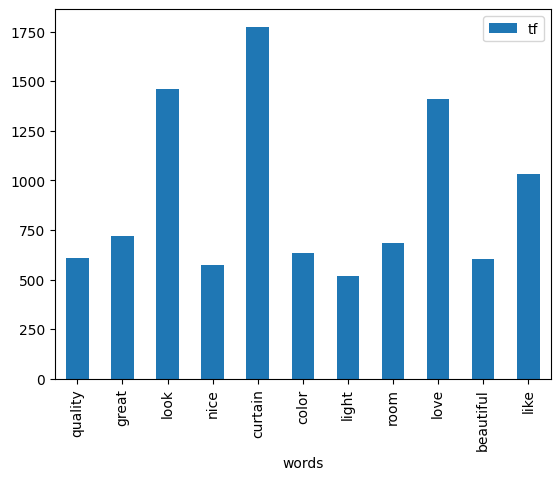

In [78]:
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()


## Wordcloud

### Görev 3: WordCloud görselleştirme işlemi
        # a. "Review" değişkeninin içerdiği tüm kelimeleri "text" isminde string olarak kaydediniz
        # b. WordCloud kullanarak şablon şeklinizi belirleyip kaydediniz
        # c. Kaydettiğiniz wordcloud'u ilk adımda oluşturduğunuz string ile generate ediniz.
        # d. Görselleştirme adımlarını tamamlayınız. (figure, imshow, axis, show)

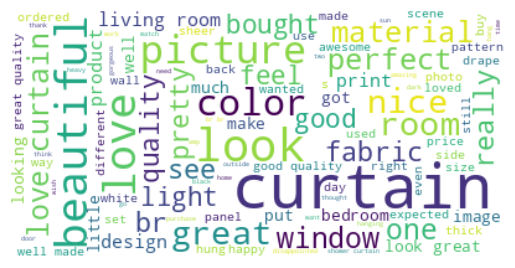

In [79]:
text = " ".join(i for i in df.Review)

wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Görev 3: Duygu Analizi

### Adım 1: Python içerisindeki NLTK paketinde tanımlanmış olan SentimentIntensityAnalyzer nesnesini oluşturunuz

In [80]:
# VADER lexicon'u indir
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Adım 2: SentimentIntensityAnalyzer nesnesi ile polarite puanlarının incelenmesi
                # a. "Review" değişkeninin ilk 10 gözlemi için polarity_scores() hesaplayınız
                # b. İncelenen ilk 10 gözlem için compund skorlarına göre filtrelenerek tekrar gözlemleyiniz
                # c. 10 gözlem için compound skorları 0'dan büyükse "pos" değilse "neg" şeklinde güncelleyiniz
                # d. "Review" değişkenindeki tüm gözlemler için pos-neg atamasını yaparak yeni bir değişken olarak dataframe'e ekleyiniz

In [81]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df["Sentiment_Label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df.groupby("Sentiment_Label")["Star"].mean()

,Star
Sentiment_Label,
neg,3.454768
pos,4.568537


#### NOT:SentimentIntensityAnalyzer ile yorumları etiketleyerek, yorum sınıflandırma makine öğrenmesi modeli için bağımlı değişken oluşturulmuş oldu.

# GÖREV 4: Makine öğrenmesine hazırlık!

### Adım 1: Bağımlı ve bağımsız değişkenlerimizi belirleyerek datayı train test olara ayırınız.

In [82]:
from sklearn.model_selection import train_test_split
# Test-Train
train_x, test_x, train_y, test_y = train_test_split(df["Review"],
                                                    df["Sentiment_Label"],
                                                    random_state=42)

### Adım 2: Makine öğrenmesi modeline verileri verebilmemiz için temsil şekillerini sayısala çevirmemiz gerekmekte.
           # a. TfidfVectorizer kullanarak bir nesne oluşturunuz.
           # b. Daha önce ayırmış olduğumuz train datamızı kullanarak oluşturduğumuz nesneye fit ediniz.
           # c. Oluşturmuş olduğumuz vektörü train ve test datalarına transform işlemini uygulayıp kaydediniz.

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF Word Level
tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

# Görev 5: Modelleme (Lojistik Regresyon)

### Adım 1: Lojistik regresyon modelini kurarak train dataları ile fit ediniz.

In [84]:
log_model = LogisticRegression().fit(x_train_tf_idf_word, train_y)

### Adım 2: Kurmuş olduğunuz model ile tahmin işlemleri gerçekleştiriniz.
        # a. Predict fonksiyonu ile test datasını tahmin ederek kaydediniz.
        # b. classification_report ile tahmin sonuçlarınızı raporlayıp gözlemleyiniz.
        # c. cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Model tahmini
y_pred = log_model.predict(x_test_tf_idf_word)

# Sınıflandırma raporunu yazdır
print(classification_report(test_y, y_pred))

# Çapraz doğrulama skoru
cross_val_mean = cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=5).mean()
print("Cross-validation mean score:", cross_val_mean)


              precision    recall  f1-score   support

         neg       0.97      0.32      0.48       223
         pos       0.89      1.00      0.94      1180

    accuracy                           0.89      1403
   macro avg       0.93      0.66      0.71      1403
weighted avg       0.90      0.89      0.87      1403

Cross-validation mean score: 0.8538891713268937


### Adım 3: Veride bulunan yorumlardan ratgele seçerek modele sorulması.
        # a. sample fonksiyonu ile "Review" değişkeni içerisinden örneklem seçierek yeni bir değere atayınız
        # b. Elde ettiğiniz örneklemi modelin tahmin edebilmesi için CountVectorizer ile vektörleştiriniz.
        # c. Vektörleştirdiğiniz örneklemi fit ve transform işlemlerini yaparak kaydediniz.
        # d. Kurmuş olduğunuz modele örneklemi vererek tahmin sonucunu kaydediniz.
        # e. Örneklemi ve tahmin sonucunu ekrana yazdırınız.


In [86]:
from sklearn.feature_extraction.text import CountVectorizer

# Rastgele bir yorum seç
random_review = pd.Series(df["Review"].sample(1).values)

# Yorumun özelliklerini çıkar
yeni_yorum = CountVectorizer().fit(train_x).transform(random_review)

# Tahmin yap
pred = log_model.predict(yeni_yorum)

# Sonucu yazdır
print(f'Review:  {random_review.values[0]} \n Prediction: {pred[0]}')


Review:  heavy hoped attractive fun. large rod pocket made easy hang. 
 Prediction: pos


# Görev 6: Modelleme (Random Forest)

### Adım 1: Random Forest modeli ile tahmin sonuçlarının gözlenmesi;
         # a. RandomForestClassifier modelini kurup fit ediniz.
         # b. cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız
         # c. Lojistik regresyon modeli ile sonuçları karşılaştırınız.

In [68]:
rf_model = RandomForestClassifier().fit(x_train_tf_idf_word, train_y)
cross_val_score(rf_model, x_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()

0.898787493645145